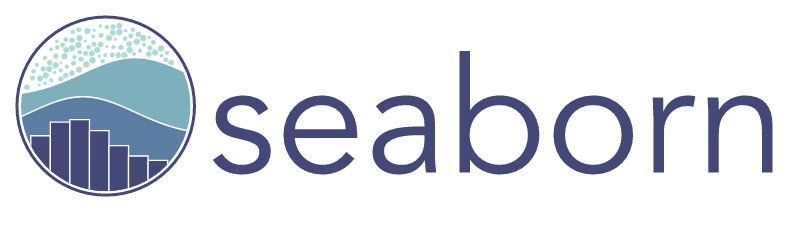

На уроке сегодня мы познакомимся с инструментами и способами визуализации данных с помощью библиотек **matplotlib** и **seaborn**. Прежде, чем приступать непосредственно к машинному обучению, важно произвести **EDA**(Exploratory Data Analysis) - Разведочный анализ данных. 
 
Он состоит в анализе основных свойств данных, нахождения в них общих закономерностей, распределений и аномалий, построение начальных моделей, зачастую с использованием инструментов визуализации.
 
Понятие введено математиком **Джоном Тьюки**, который сформулировал цели такого анализа следующим образом:
 
1.   Максимальное «проникновение» в данные
2.   Выявление основных структур
3.   Выбор наиболее важных переменных
4.   Обнаружение отклонений и аномалий
5.   Проверка основных гипотез


In [ ]:
# Библиотека для работы с табличными данными
import pandas as pd
# Библиотека для вычислений линейной алгебры
import numpy as np
# Библиотеки для визуализации
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Начнем с чтения csv данных
df = pd.read_csv('sample_data/california_housing_train.csv')

In [ ]:
# Первые пять строк
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


# Изображаем статистические отношения
## **Scatterplot** (Точечный график)

Математическая диаграмма, изображающая значения двух переменных в виде точек на декартовой плоскости. 

Библиотека **seaborn** без труда принимает **pandas** DataFrame(таблицу). Чтобы изобразить отношения между двумя столбцами достаточно указать, какой стобец отоброзить по оси **x**, а какой по оси **y**

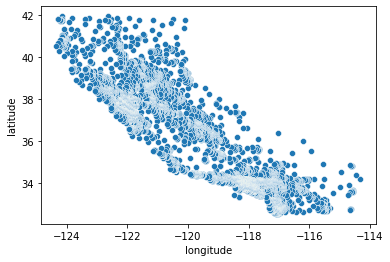

In [ ]:
# Изображения точек долготы по отношению к широте.
# Можно заметить, что дома расположены в определенной "полосе" долготы и широты
sns.scatterplot(data=df, x="longitude", y="latitude")
plt.show()

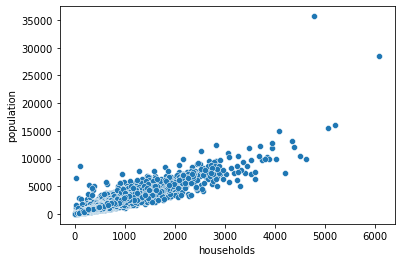

In [ ]:
# Самостоятельная работа №1
# Изобразите отношение households к population
sns.scatterplot(data=df, x="households", y="population")
plt.show()

Помимо двумерных отношений, мы можем добавить "дополнительное измерение" с помощью цвета. В данном случае опять же достаточно очевидное отношение, чем выше кол-во семей, тем выше кол-во людей и соответвтственно комнат

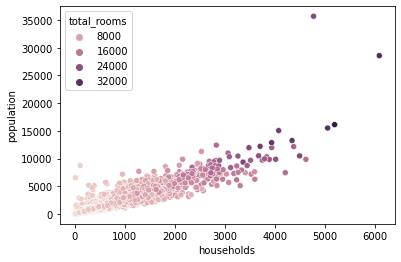

In [ ]:
sns.scatterplot(data=df, x="households", y="population",  hue="total_rooms")
plt.show()

Помимо обозначения дополнительного измерения цветом мы можем использовать **size**

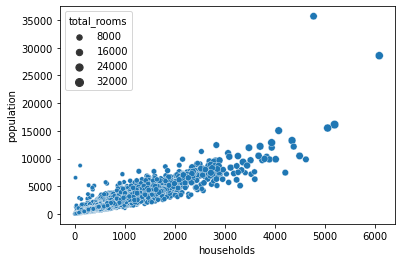

In [ ]:
# Самостоятельная работа №2
# Добавьте total_rooms используя дополнительное измерение size
sns.scatterplot(data=df, x="households", y="population",  size="total_rooms")
plt.show()

Мы можем визуализировать сразу несколько отношений используя класс **PairGrid** внутри **seaborn**

**PairGrid** принимает как аргумент pandas **DataFrame** и визуализирует все возможные отношения между ними, в соответствии с выбранным типом графика.

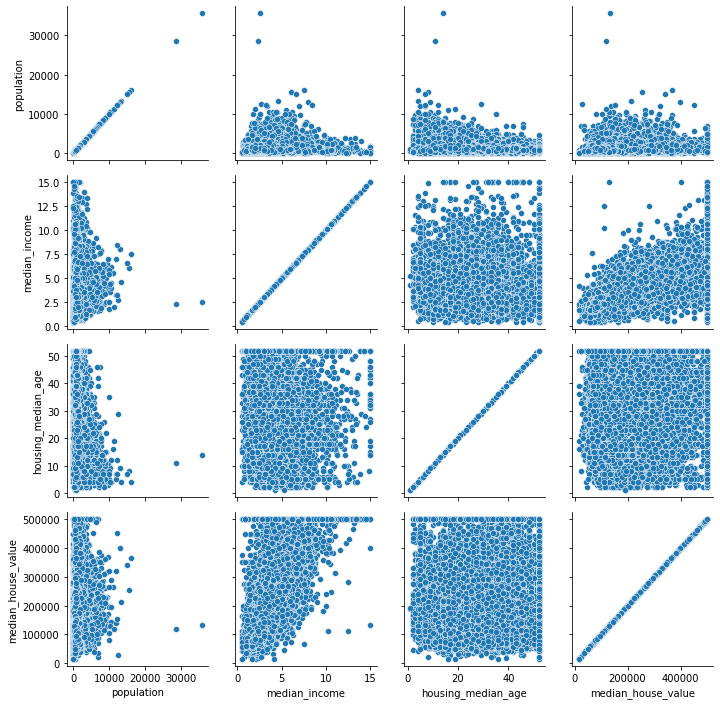

In [ ]:
cols = ['population', 'median_income', 'housing_median_age', 'median_house_value']
g = sns.PairGrid(df[cols])
g.map(sns.scatterplot)
plt.show()

Как вы думаете, чем вызвана линейная зависимость по диагонали?

## Линейные графики
Хорошо подойдут, если есть временная или кака-либо иная последовательность и значения, которые могум меняться в зависимости от неё.

Для генерации линейных графиков в **seaborn** используется **relplot** функция.
Она также принимает **DataFrame**, **x**, **y** - столбцы.

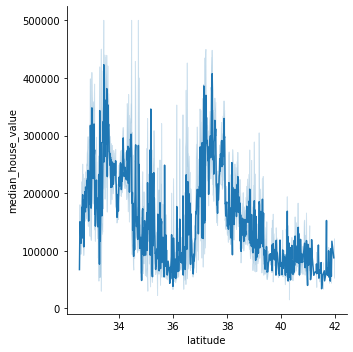

In [ ]:
# Для визуализации выбирается тип line
sns.relplot(x="latitude", y="median_house_value", kind="line", data=df)

Можно видеть, что в определеных местах долготы цена за дома резко подскакивает

In [ ]:
# Самостоятельная работа №3
# Визуализировать longitude по отношения к median_house_value
# Используя линейный график

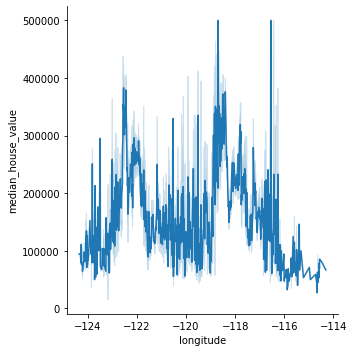

In [ ]:
sns.relplot(x="longitude", y="median_house_value", kind="line", data=df)

In [ ]:
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0


Можно видеть, что в определеных местах широты цена за дома также очень высока

Используя точечный график можно визуализировать эти отношения с большей четкостью. Скорее всего резкий рост цен связан с близостью к ценному объекту, повышающему качество жизни, скорее всего побережью океана или реки.

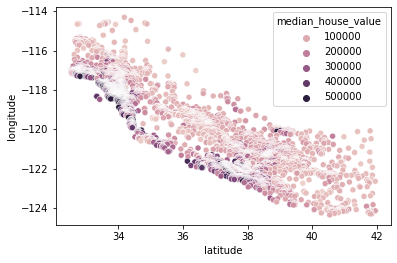

In [ ]:
sns.scatterplot(data=df, x="latitude", y="longitude",  hue="median_house_value")
plt.show()

# Гистограмма
Способ представления табличных данных в графическом виде — в виде столбчатой диаграммы. По оси **x** обычно указывают значение, а по оси **y** - встречаемость(кол-во таких значений в выборке)

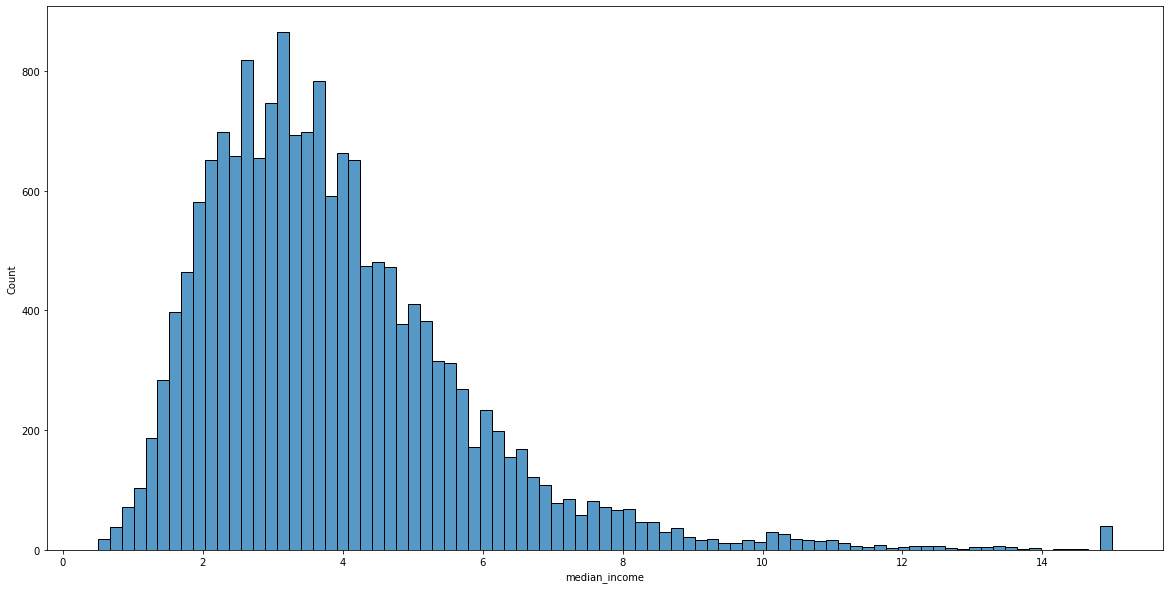

In [ ]:
plt.figure(figsize=(20,10))
sns.histplot(data=df, x="median_income")
plt.show()

Можно видеть что у большинства семей доход находится между значениями 2 и 6.
И только очень небольшое ко-во людей обладают доходом > 10

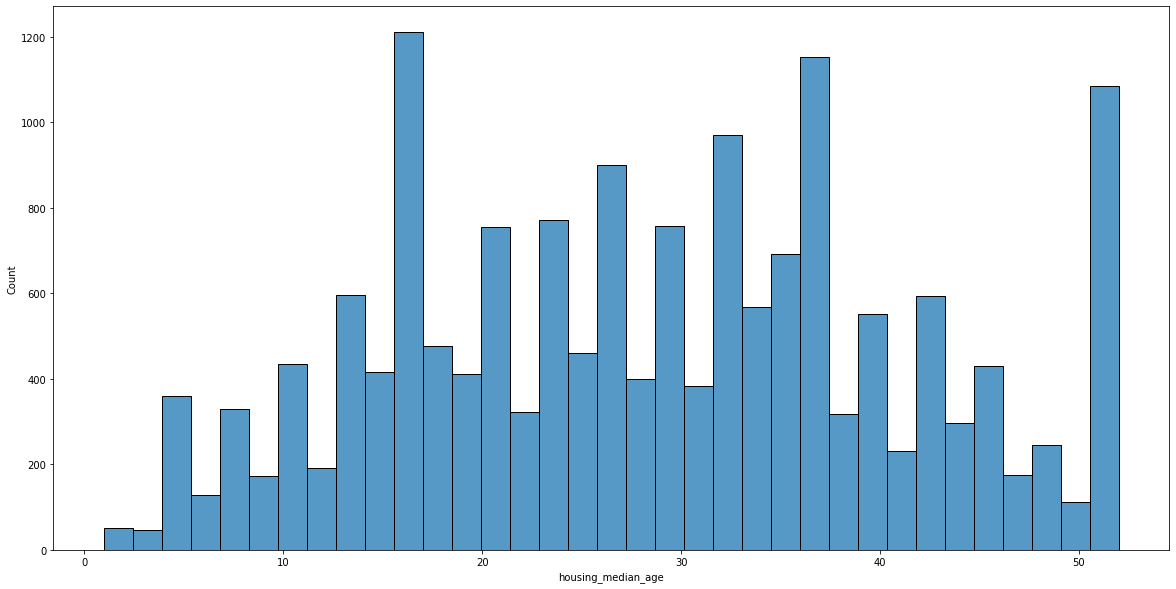

In [ ]:
# Самостоятельная работа №5
# Изобраить гистограмму по housing_median_age
plt.figure(figsize=(20,10))
sns.histplot(data=df, x="housing_median_age")

Распределение по возрасту более равномерное. Большую часть жителей составляют люди в возрасте от 20 до 40 лет. Но и молодежи не мало. Также очень много пожилых людей > 50 лет медианный возраст.

Давайте посмотрим медианный доход у пожилых жителей

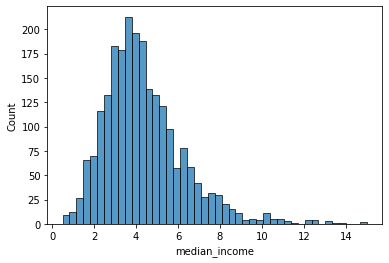

In [ ]:
sns.histplot(data=df[df['housing_median_age']<15], x="median_income")

Большого отличия от популяции в целом не наблюдается. Скорее всего это местные жители.

Давайте посмотрим на популяцию

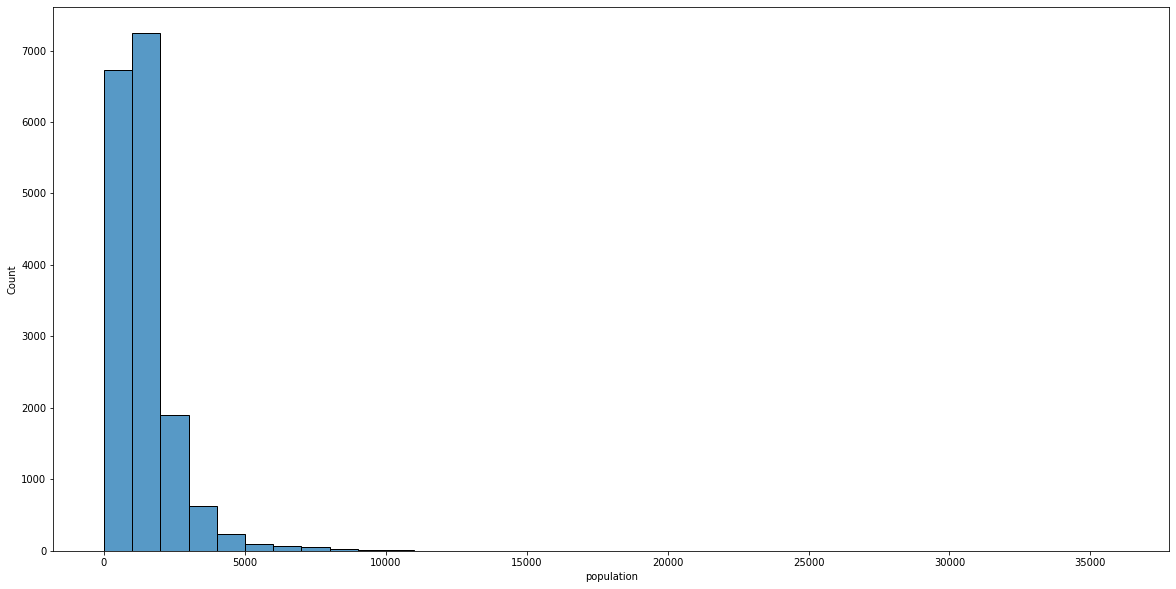

In [ ]:
plt.figure(figsize=(20,10))
sns.histplot(data=df, x="population", binwidth=1000, bins = 20)

Разобьем возрастные группы на 3 категории те кто моложе 20 лет, от 20 до 50 и от 50, чтобы посмотреть влияет ли это на доход.

In [ ]:
df.loc[df['housing_median_age'] <= 20, 'age_group'] = 'Молодые'
df.loc[(df['housing_median_age'] > 20) & (df['housing_median_age'] <= 50), 'age_group'] = 'Ср. возраст'
df.loc[df['housing_median_age'] > 50, 'age_group'] = 'Пожилые'

Применим group_by, чтобы получить среднее значение
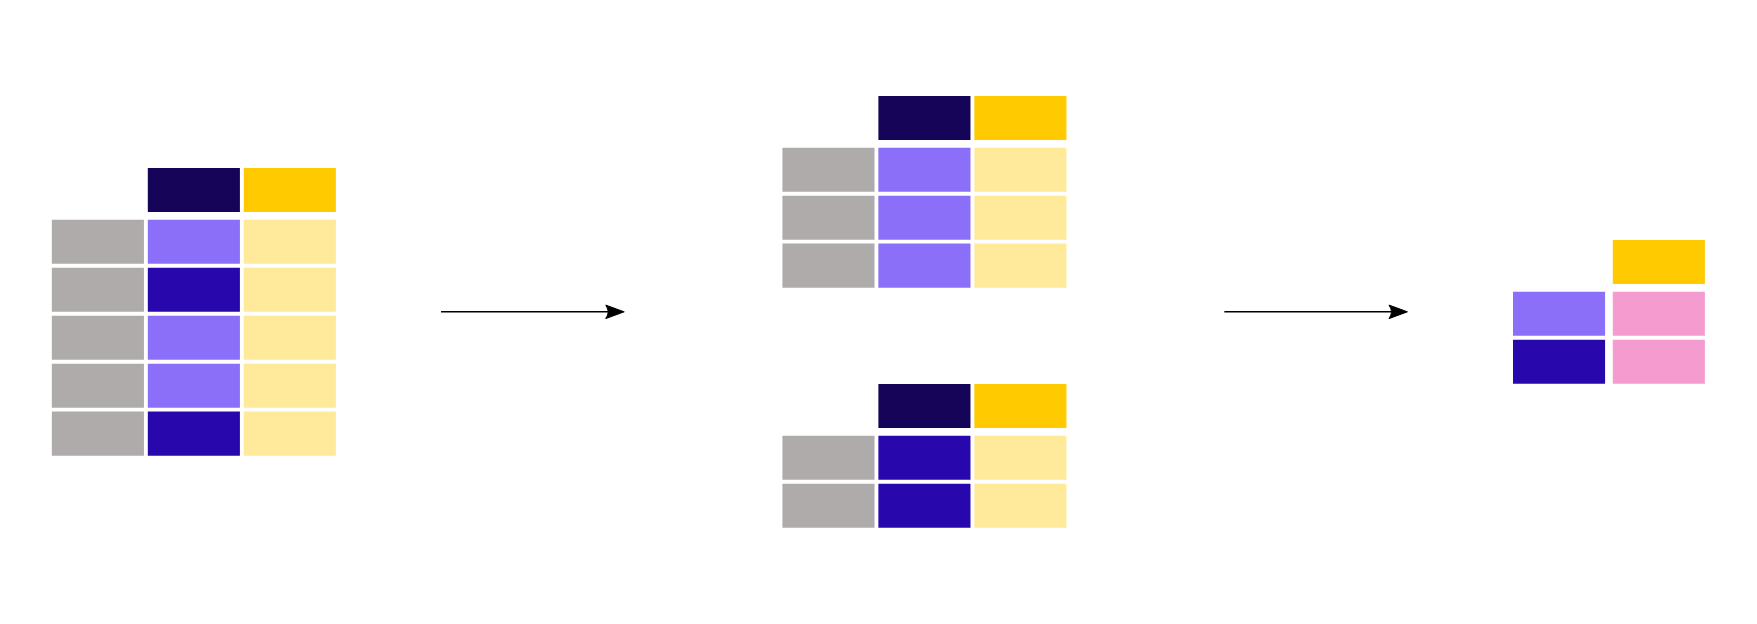

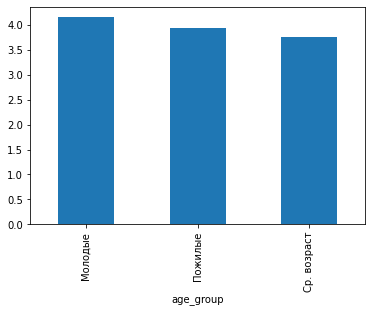

In [ ]:
df.groupby('age_group')['median_income'].mean().plot(kind='bar')

Молодые оказываются самой богатой группой населения. Но отличие в доходе не значительное.

**Seaborn** так же позволяет нам смотреть распределение по многим параметрам.
Давайте поделим группы по доходам на 2. Те у кого медианный доход выше 6 и те у кого меньше. Изобразим дополнительное измерение с помощью оттенка в виде возрастных групп и групп по доходам.


In [ ]:
df.loc[df['median_income'] > 6, 'income_group'] = 'rich'
df.loc[df['median_income'] < 6, 'income_group'] = 'everyone_else'

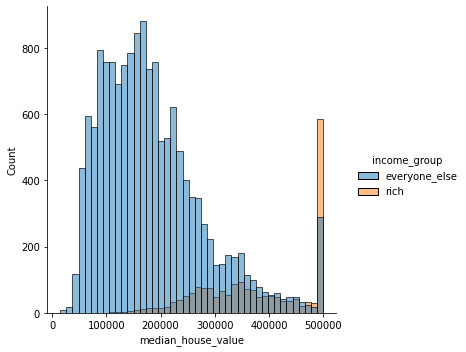

In [ ]:
sns.displot(df, x="median_house_value", hue="income_group")

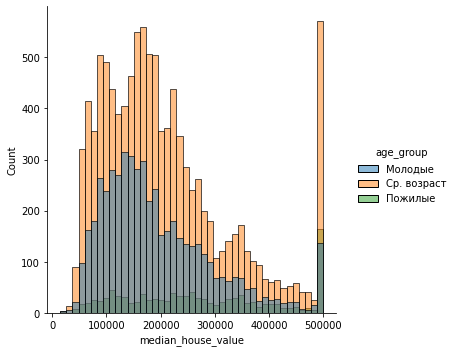

In [ ]:
# Самостоятельная работа 
# Изобразить гистограмму по median_house_value с оттенком age_group
sns.displot(df, x="median_house_value", hue="age_group")

# Heatmaps(Корелляция)
Посмотрим как данные коррелируют между собой.

In [ ]:
corr = df.corr()

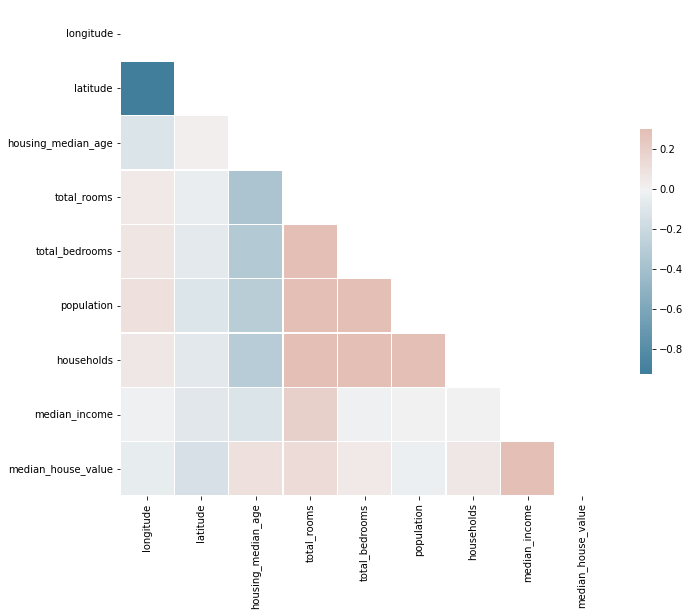

In [ ]:
mask = np.triu(np.ones_like(corr, dtype=bool))

# Создаем полотно для отображения большого графика
f, ax = plt.subplots(figsize=(11, 9))

# Создаем цветовую политру
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Визуализируем данные кореляции 
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Выводы

Анализ данных должен предоставлять информацию и инсайт, которые не видные невооруженным взглядом. В этом и есть красота аналитики. В данном случае можно сделать следующий выводы. Стоимость домов напрямую зависит от их расположения, в определенной полосе(скорее всего побережье) цена на дома высокая. Чем выше доход, тем больше шанс, что человек проживает в богатом районе. Возраст никак не коррелирует с доходом. Распределение по возрастам примерно одинаковое во всех группах доходов. Ну и из очевидно чем больше людей, тем больше семей, и соответственно комнат и спален.

# Самостоятельная работа
Написать **EDA** для датасета про пингвинов

### Необходимо:


*   Использовать 2-3 точечных графика
*   Применить доп измерение в точечных графиках, используя аргументы **hue**, **size**, **stile**
*   Использовать **PairGrid** с типом графика на ваш выбор
*   Изобразить **Heatmap**
*   Использовать 2-3 гистограммы




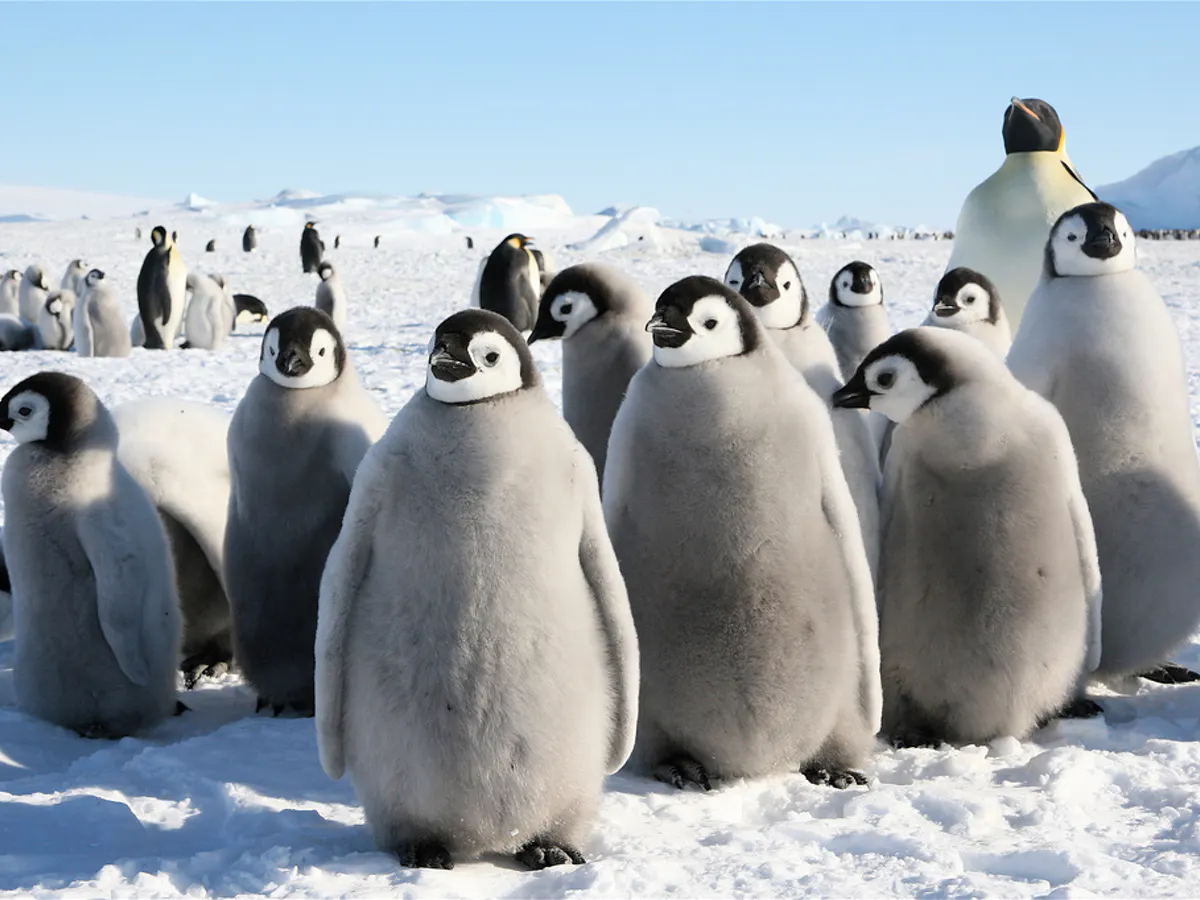

In [ ]:
penguins = sns.load_dataset("penguins")

In [ ]:
# Первые 5 строк датасета про пингвинов
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
list(set(penguins))

['body_mass_g',
 'island',
 'flipper_length_mm',
 'bill_depth_mm',
 'bill_length_mm',
 'species',
 'sex']

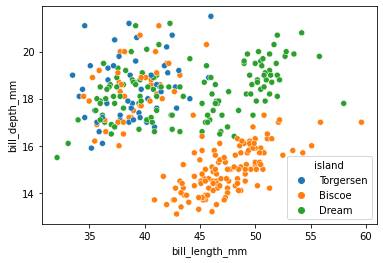

In [ ]:
sns.scatterplot(data=penguins, x="bill_length_mm", y="bill_depth_mm",  hue="island")

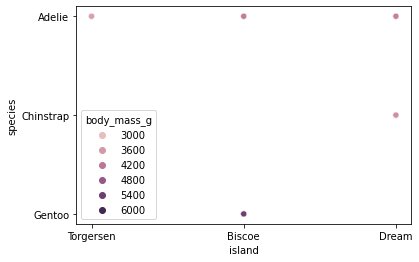

In [ ]:
sns.scatterplot(data=penguins, x="island", y="species",  hue="body_mass_g")

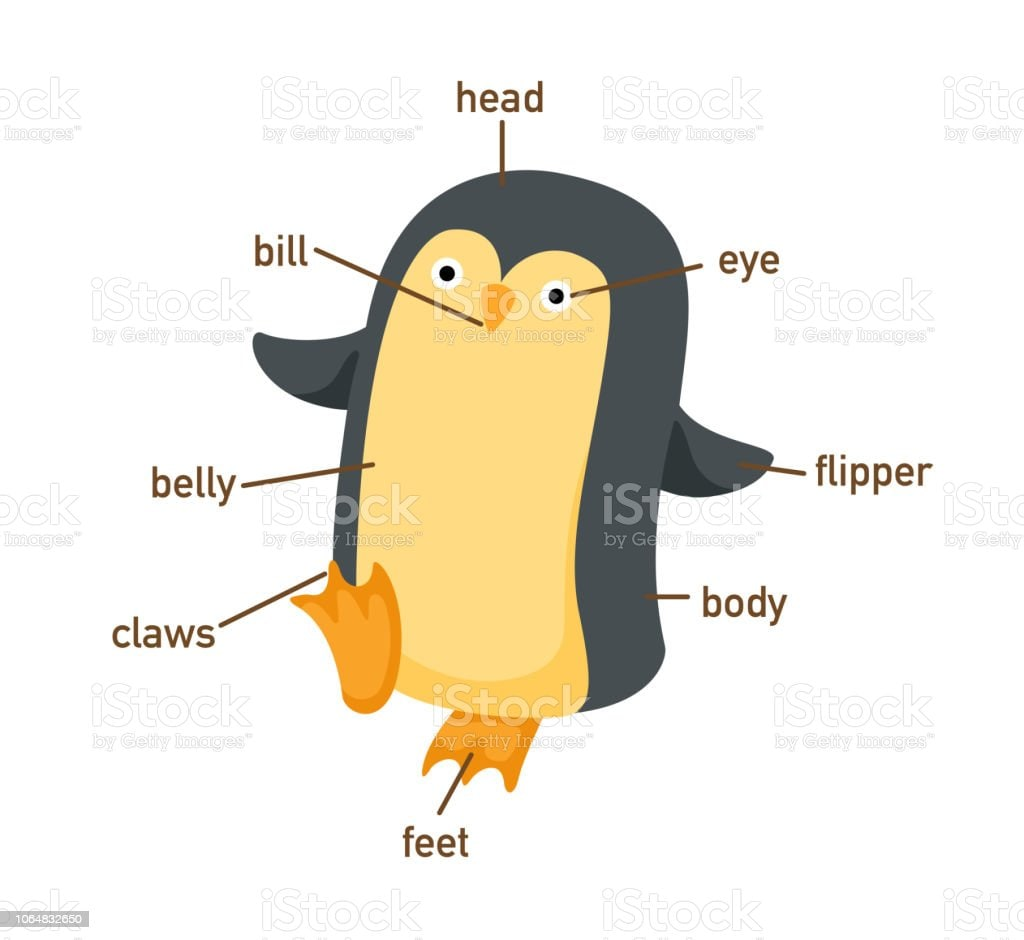

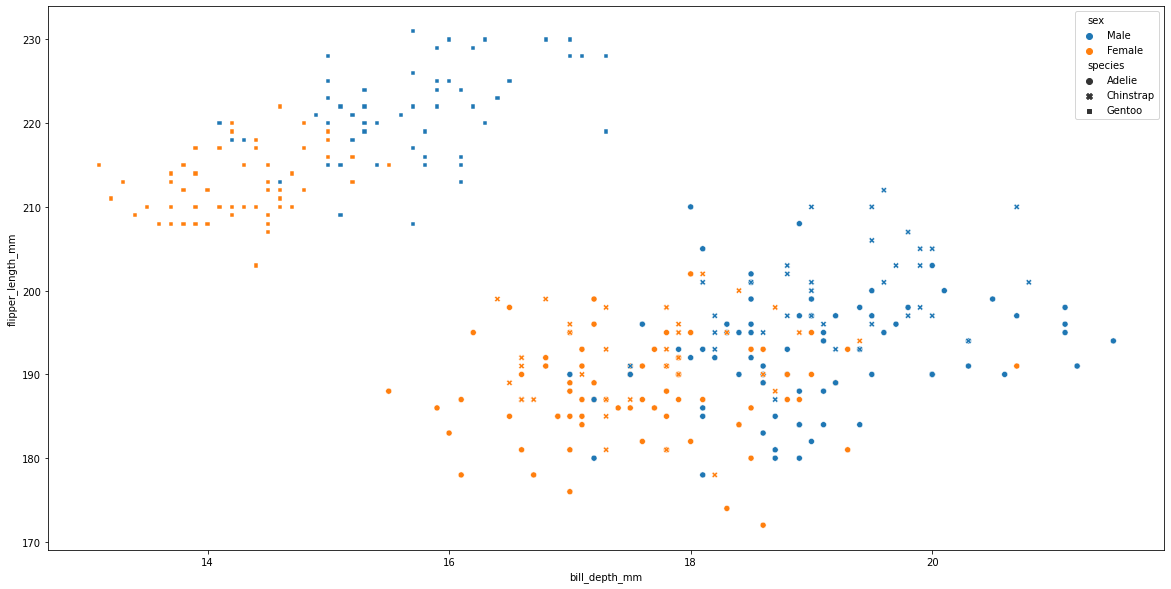

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=penguins, x="bill_depth_mm", y="flipper_length_mm",  hue="sex", style = 'species')

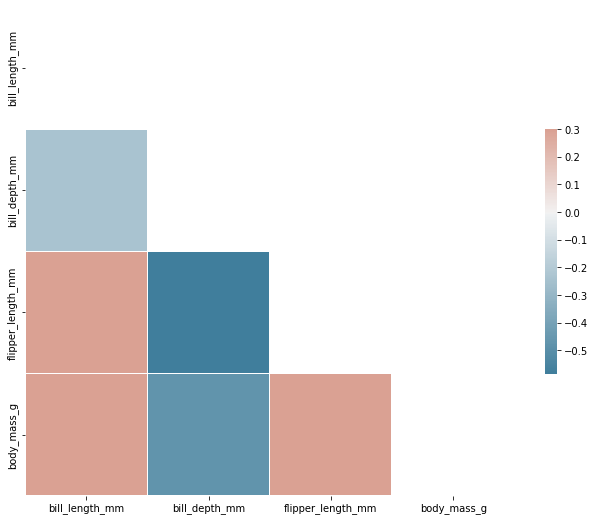

In [ ]:
corr1 = penguins.corr()
mask = np.triu(np.ones_like(corr1, dtype=bool))

# Создаем полотно для отображения большого графика
f, ax = plt.subplots(figsize=(11, 9))

# Создаем цветовую политру
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Визуализируем данные кореляции 
sns.heatmap(corr1, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


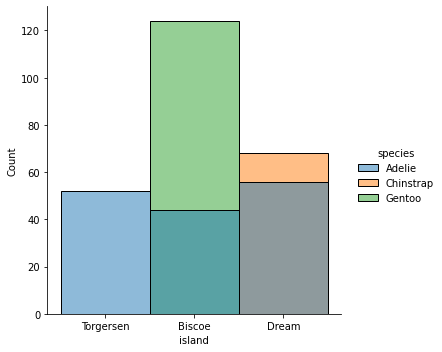

In [ ]:
sns.displot(penguins, x="island", hue="species")

In [ ]:
list(set(penguins['island']))

['Torgersen', 'Dream', 'Biscoe']

In [ ]:
list(set(penguins['species']))

['Chinstrap', 'Gentoo', 'Adelie']